In [15]:
import torch
import inspect
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds


from sedct_explainer import *
from model_wrappers import *
from image_segmentations import *

In [16]:
if torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
elif torch.cuda.is_available():
    DEVICE = torch.device("cuda")
else:
    DEVICE = torch.device("cpu")
print(DEVICE)

mps


# Test image_segmentations 

In [18]:
# Dataset
def load_tfds_data(dataset):
    ds = tfds.load(dataset, split=['train[:10%]', 'train[10%:]'], as_supervised=True)
    ds = ds[0]
    images, labels = [], []

    for img, label in tfds.as_numpy(ds):
        images.append(img)
        labels.append(label)
    
    X = np.array(images, dtype=object)
    y = np.array(labels)
    return X, y

#Auxiliary function
def image_info(image):
    try:
        print(image.shape) 
        print(image.dtype)
    except Exception:
        print(image.size)
        print(image.mode)
    print(type(image))

In [19]:
X , y = load_tfds_data("cats_vs_dogs")

print(X.shape, y.shape)

2025-06-04 16:29:16.110576: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


(2326,) (2326,)


2025-06-04 16:29:16.952356: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(375, 500, 3)
uint8
<class 'numpy.ndarray'>


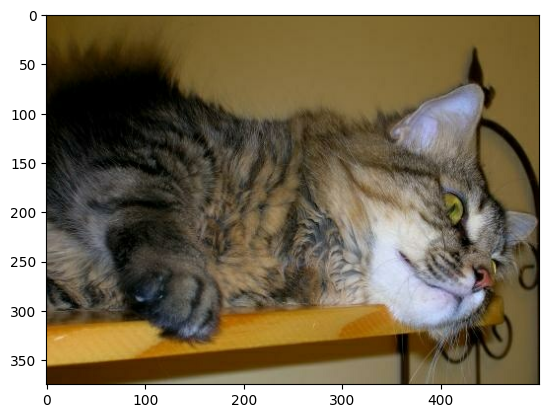

In [20]:
# Image numpy.ndaray
img_np = X[3]

plt.imshow(img_np)
image_info(img_np)

In [21]:
# Image torch.tensor
img_tensor = torch.from_numpy(img_np)
img_tensor = img_tensor.permute(2, 0, 1).float()
img_tensor = img_tensor / 255.0

image_info(img_tensor)

torch.Size([3, 375, 500])
torch.float32
<class 'torch.Tensor'>


In [22]:
# Image PIL
from PIL import Image
img_pil = Image.fromarray(img_np)

image_info(img_pil)

(500, 375)
RGB
<class 'PIL.Image.Image'>


(375, 500)
uint8
<class 'numpy.ndarray'>


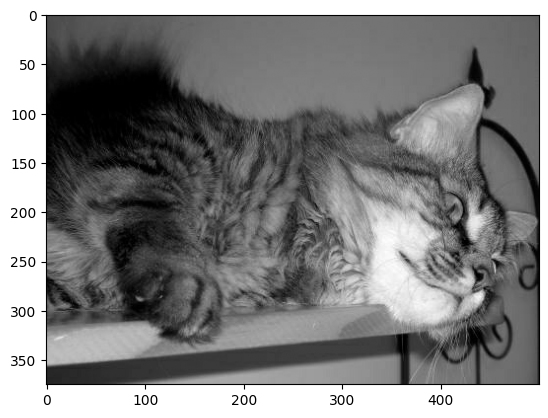

In [23]:
# Image grayscale (numpy.ndarray)
gray_pil = img_pil.convert('L')  # 'L' = grayscale mode
img_gray_np = np.array(gray_pil)

image_info(img_gray_np)
plt.imshow(img_gray_np, cmap='gray')

## Tensor

In [9]:
# Different to test support to different images formats
tensorIS_1 = TorchImageSegmentation(img_np)
tensorIS_2 = TorchImageSegmentation(img_tensor)
tensorIS_3 = TorchImageSegmentation(img_pil)
tensorIS_4 = TorchImageSegmentation(img_gray_np)

image_info(tensorIS_1.image)
image_info(tensorIS_2.image)
image_info(tensorIS_3.image)
image_info(tensorIS_4.image)

torch.Size([3, 375, 500])
torch.uint8
<class 'torch.Tensor'>
torch.Size([3, 375, 500])
torch.float32
<class 'torch.Tensor'>
torch.Size([3, 375, 500])
torch.uint8
<class 'torch.Tensor'>
torch.Size([375, 500])
torch.uint8
<class 'torch.Tensor'>


In [10]:
# Inspection of the attrbutes and methods
inspect.getmembers(tensorIS_1)

[('__abstractmethods__', frozenset()),
 ('__class__', image_segmentations.TorchImageSegmentation),
 ('__delattr__',
  <method-wrapper '__delattr__' of TorchImageSegmentation object at 0x16d4a92d0>),
 ('__dict__',
  {'image': tensor([[[ 91,  93,  92,  ..., 108, 108, 107],
            [ 91,  93,  92,  ..., 108, 108, 108],
            [ 91,  93,  92,  ..., 108, 108, 108],
            ...,
            [ 60,  60,  60,  ...,  81,  61,  39],
            [ 61,  61,  61,  ...,  81,  61,  39],
            [ 60,  60,  60,  ...,  82,  62,  39]],
   
           [[ 65,  67,  66,  ...,  85,  85,  84],
            [ 65,  67,  66,  ...,  85,  85,  85],
            [ 65,  67,  66,  ...,  85,  85,  85],
            ...,
            [ 29,  29,  29,  ...,  77,  56,  34],
            [ 30,  30,  30,  ...,  77,  56,  34],
            [ 29,  29,  29,  ...,  76,  56,  33]],
   
           [[  6,   8,   7,  ...,  31,  31,  30],
            [  6,   8,   7,  ...,  31,  31,  31],
            [  6,   8,   7,  ..., 

/Users/zenna/uni/project_work/SEDCT/image_segmentations.py:215: UserWarning: No segmentation method was specified. 'slic' method with default parameters as been used.
  warnings.warn("No segmentation method was specified. 'slic' method with default parameters as been used.", category=UserWarning)


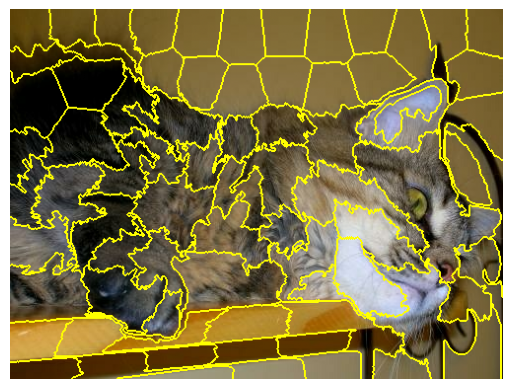

In [11]:
# Comput the segmentaion without having specifid a semgentation method, nor other specific parameters
#   -> slic is used as default and a userwarning is issued
tensorIS_1.compute_segmentation(show=True)

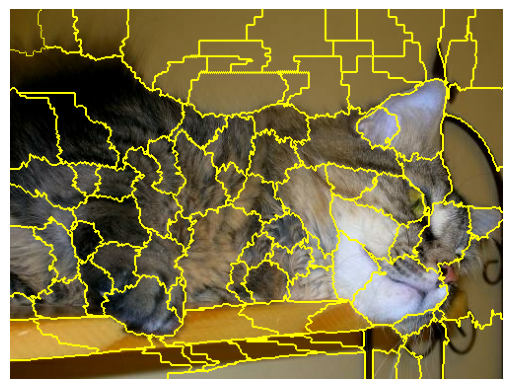

In [12]:
# Compute the segmentation with a specific method and parameters
tensorIS_1.compute_segmentation('quickshift', kernel_size=6, max_dist=15, ratio=0.2, show=True)

In [13]:
# Inspection of updated parameters
inspect.getmembers(tensorIS_1)

[('__abstractmethods__', frozenset()),
 ('__class__', image_segmentations.TorchImageSegmentation),
 ('__delattr__',
  <method-wrapper '__delattr__' of TorchImageSegmentation object at 0x16d4a92d0>),
 ('__dict__',
  {'image': tensor([[[ 91,  93,  92,  ..., 108, 108, 107],
            [ 91,  93,  92,  ..., 108, 108, 108],
            [ 91,  93,  92,  ..., 108, 108, 108],
            ...,
            [ 60,  60,  60,  ...,  81,  61,  39],
            [ 61,  61,  61,  ...,  81,  61,  39],
            [ 60,  60,  60,  ...,  82,  62,  39]],
   
           [[ 65,  67,  66,  ...,  85,  85,  84],
            [ 65,  67,  66,  ...,  85,  85,  85],
            [ 65,  67,  66,  ...,  85,  85,  85],
            ...,
            [ 29,  29,  29,  ...,  77,  56,  34],
            [ 30,  30,  30,  ...,  77,  56,  34],
            [ 29,  29,  29,  ...,  76,  56,  33]],
   
           [[  6,   8,   7,  ...,  31,  31,  30],
            [  6,   8,   7,  ...,  31,  31,  31],
            [  6,   8,   7,  ..., 

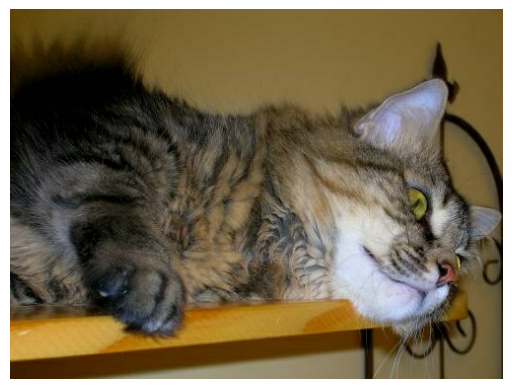

In [14]:
# Method to show the image 
tensorIS_1.show_image()

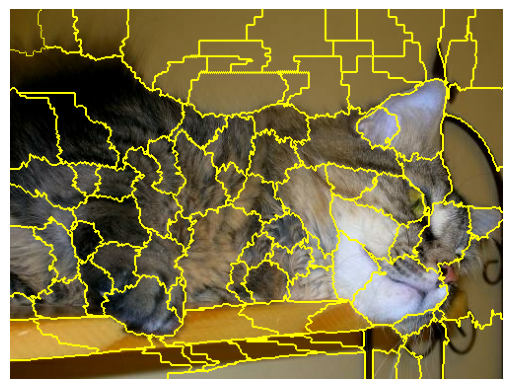

In [15]:
# Method to show the segmented image
tensorIS_1.show_segmented_image()

In [16]:
# Method to retrieve the image
image = tensorIS_1.get_image()
image_info(image)

torch.Size([3, 375, 500])
torch.uint8
<class 'torch.Tensor'>


In [17]:
# Method to retrieve the segmented image
segmented_image = tensorIS_1.get_segmented_image()
image_info(segmented_image)

torch.Size([3, 375, 500])
torch.float64
<class 'torch.Tensor'>


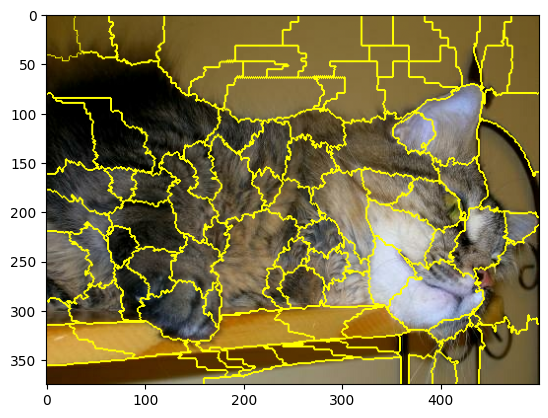

In [18]:
plt.imshow(segmented_image.permute(1,2,0))

In [19]:
# Method to retrieve the number of segments the image has been segmented into
tensorIS_1.get_n_segments()

90

In [20]:
# Method to retrieve the segmentation map
segments = tensorIS_1.get_segments()
segments

array([[ 0,  0,  0, ..., 16, 16, 16],
       [ 0,  0,  0, ..., 16, 16, 16],
       [ 0,  0,  0, ..., 16, 16, 16],
       ...,
       [85, 85, 85, ..., 84, 84, 84],
       [85, 85, 85, ..., 84, 84, 84],
       [85, 85, 85, ..., 84, 84, 84]])

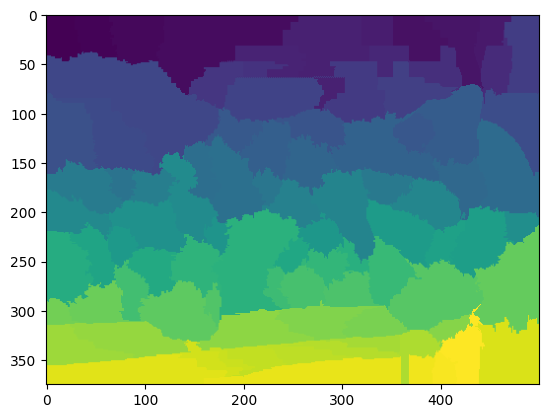

In [21]:
plt.imshow(segments)

In [22]:
# Method to retrieve a map where only the provided segment is show
#   A single integer or a list of integers can be provided

id = tensorIS_1.get_ids_image(4)
#id = tensorIS_1.get_ids_image([4, 2, 5])
id

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

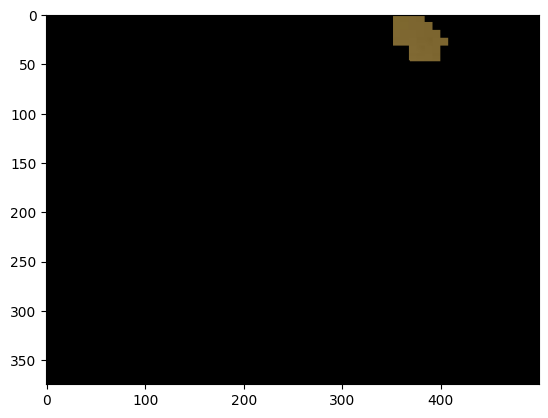

In [23]:
plt.imshow(id.permute(1,2,0))

In [24]:
# Method to retrieve a binary map (where the provided segments are 1)
#   A single integer or a list of integers can be provided

mask_id = tensorIS_1.get_ids_mask(4)
mask_id

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

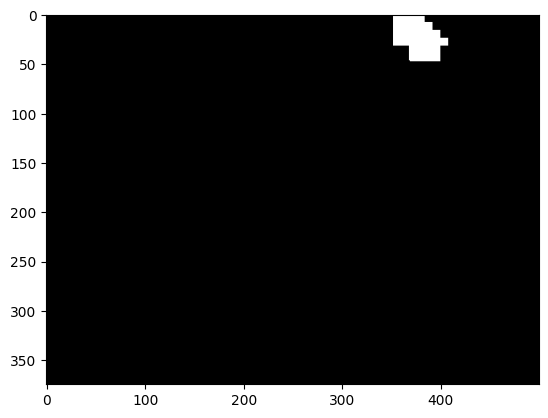

In [25]:
plt.imshow(mask_id, cmap='gray')

In [26]:
# Method that return the image without the segment specified
#   A single integer or a list of integers can be provided

removed_image = tensorIS_1.remove_segment(5)
# removed_image = tensorIS_1.remove_segment([3, 6, 28])
removed_image

/Users/zenna/uni/project_work/SEDCT/image_segmentations.py:459: UserWarning: No method to fill the removed segment(s) was specified. 'fill' method as been used as default.
  warnings.warn("No method to fill the removed segment(s) was specified. 'fill' method as been used as default.", category=UserWarning)


tensor([[[ 91,  93,  92,  ..., 108, 108, 107],
         [ 91,  93,  92,  ..., 108, 108, 108],
         [ 91,  93,  92,  ..., 108, 108, 108],
         ...,
         [ 60,  60,  60,  ...,  81,  61,  39],
         [ 61,  61,  61,  ...,  81,  61,  39],
         [ 60,  60,  60,  ...,  82,  62,  39]],

        [[ 65,  67,  66,  ...,  85,  85,  84],
         [ 65,  67,  66,  ...,  85,  85,  85],
         [ 65,  67,  66,  ...,  85,  85,  85],
         ...,
         [ 29,  29,  29,  ...,  77,  56,  34],
         [ 30,  30,  30,  ...,  77,  56,  34],
         [ 29,  29,  29,  ...,  76,  56,  33]],

        [[  6,   8,   7,  ...,  31,  31,  30],
         [  6,   8,   7,  ...,  31,  31,  31],
         [  6,   8,   7,  ...,  31,  31,  31],
         ...,
         [  0,   0,   0,  ...,  52,  34,  12],
         [  1,   1,   1,  ...,  52,  34,  12],
         [  0,   0,   0,  ...,  54,  34,  11]]], dtype=torch.uint8)

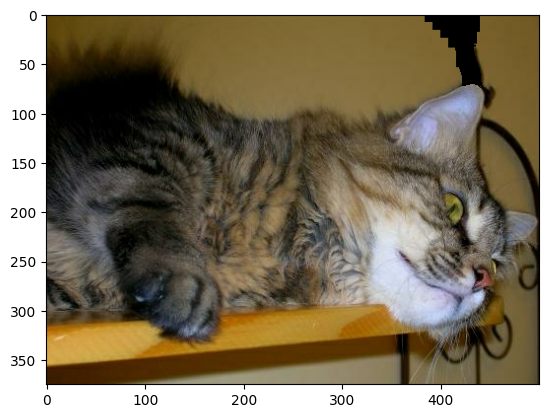

In [27]:
plt.imshow(removed_image.permute(1,2,0))

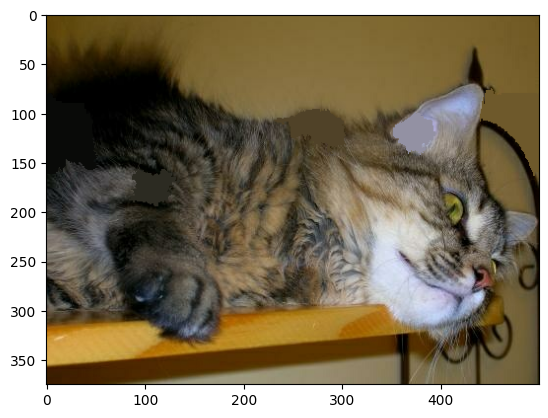

In [28]:
removed_image2 = tensorIS_1.remove_segment(fill_method='mean', segment=[22, 21, 23, 24, 38])
plt.imshow(removed_image2.permute(1,2,0))

In [29]:
# Default segmentation is slic, adapted also to grayscale
tensorIS_4.compute_segmentation()

/Users/zenna/uni/project_work/SEDCT/image_segmentations.py:215: UserWarning: No segmentation method was specified. 'slic' method with default parameters as been used.
  warnings.warn("No segmentation method was specified. 'slic' method with default parameters as been used.", category=UserWarning)


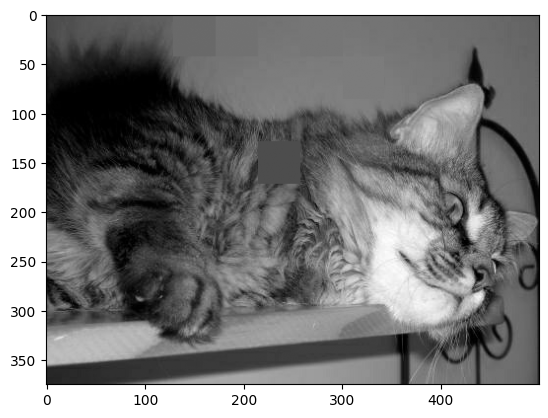

In [30]:
# Test also on grayscale images
removed_image3 = tensorIS_4.remove_segment(fill_method='mean', segment=[4,5,20, 42, 7])
plt.imshow(removed_image3, cmap='gray')

## ndarray

In [31]:
# Different to test support to different images formats
ndarrayIS_1 = SKimageImageSegmentation(img_np)
ndarrayIS_2 = SKimageImageSegmentation(img_tensor)
ndarrayIS_3 = SKimageImageSegmentation(img_pil)
ndarrayIS_4 = SKimageImageSegmentation(img_gray_np)

image_info(ndarrayIS_1.image)
image_info(ndarrayIS_2.image)
image_info(ndarrayIS_3.image)
image_info(ndarrayIS_4.image)

(375, 500, 3)
uint8
<class 'numpy.ndarray'>
(375, 500, 3)
float32
<class 'numpy.ndarray'>
(375, 500, 3)
uint8
<class 'numpy.ndarray'>
(375, 500)
uint8
<class 'numpy.ndarray'>


In [32]:
# Inspection of the attributes and methods
inspect.getmembers(ndarrayIS_1)

[('__abstractmethods__', frozenset()),
 ('__class__', image_segmentations.SKimageImageSegmentation),
 ('__delattr__',
  <method-wrapper '__delattr__' of SKimageImageSegmentation object at 0x16e5c7210>),
 ('__dict__',
  {'image': array([[[ 91,  65,   6],
           [ 93,  67,   8],
           [ 92,  66,   7],
           ...,
           [108,  85,  31],
           [108,  85,  31],
           [107,  84,  30]],
   
          [[ 91,  65,   6],
           [ 93,  67,   8],
           [ 92,  66,   7],
           ...,
           [108,  85,  31],
           [108,  85,  31],
           [108,  85,  31]],
   
          [[ 91,  65,   6],
           [ 93,  67,   8],
           [ 92,  66,   7],
           ...,
           [108,  85,  31],
           [108,  85,  31],
           [108,  85,  31]],
   
          ...,
   
          [[ 60,  29,   0],
           [ 60,  29,   0],
           [ 60,  29,   0],
           ...,
           [ 81,  77,  52],
           [ 61,  56,  34],
           [ 39,  34,  12]],
   

/Users/zenna/uni/project_work/SEDCT/image_segmentations.py:215: UserWarning: No segmentation method was specified. 'slic' method with default parameters as been used.
  warnings.warn("No segmentation method was specified. 'slic' method with default parameters as been used.", category=UserWarning)


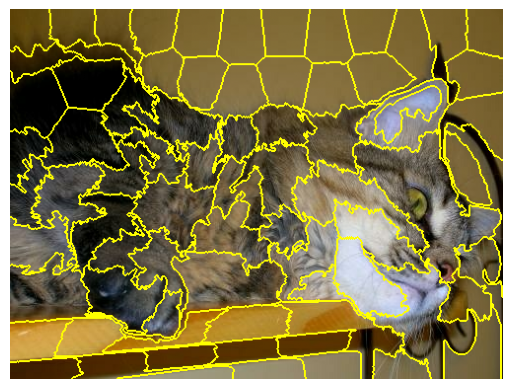

In [33]:
# Compute the segmentation without specifying a method or parameters
#   -> 'slic' is used as default and a UserWarning is issued
ndarrayIS_1.compute_segmentation(show=True)

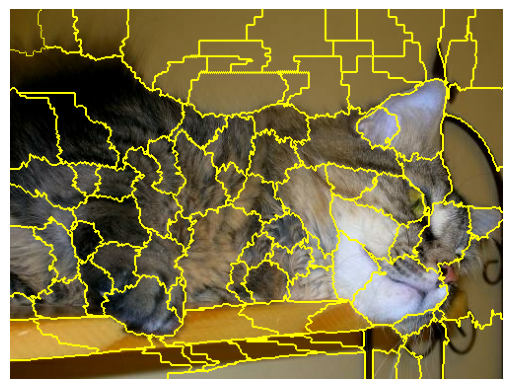

In [34]:
# Compute the segmentation with a specific method and parameters
ndarrayIS_1.compute_segmentation('quickshift', kernel_size=6, max_dist=15, ratio=0.2, show=True)

In [35]:
# Inspection of updated parameters
inspect.getmembers(ndarrayIS_1)

[('__abstractmethods__', frozenset()),
 ('__class__', image_segmentations.SKimageImageSegmentation),
 ('__delattr__',
  <method-wrapper '__delattr__' of SKimageImageSegmentation object at 0x16e5c7210>),
 ('__dict__',
  {'image': array([[[ 91,  65,   6],
           [ 93,  67,   8],
           [ 92,  66,   7],
           ...,
           [108,  85,  31],
           [108,  85,  31],
           [107,  84,  30]],
   
          [[ 91,  65,   6],
           [ 93,  67,   8],
           [ 92,  66,   7],
           ...,
           [108,  85,  31],
           [108,  85,  31],
           [108,  85,  31]],
   
          [[ 91,  65,   6],
           [ 93,  67,   8],
           [ 92,  66,   7],
           ...,
           [108,  85,  31],
           [108,  85,  31],
           [108,  85,  31]],
   
          ...,
   
          [[ 60,  29,   0],
           [ 60,  29,   0],
           [ 60,  29,   0],
           ...,
           [ 81,  77,  52],
           [ 61,  56,  34],
           [ 39,  34,  12]],
   

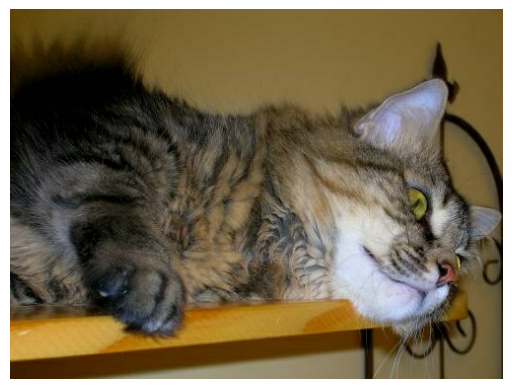

In [36]:
# Method to show the image 
ndarrayIS_1.show_image()

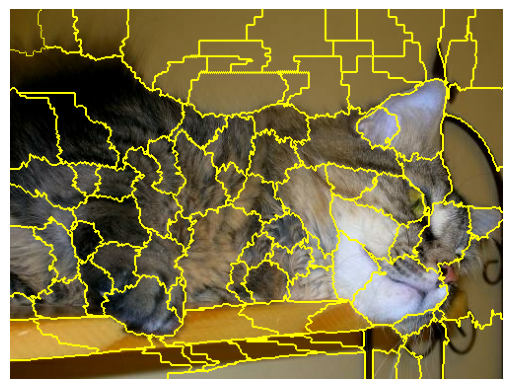

In [37]:
# Method to show the segmented image
ndarrayIS_1.show_segmented_image()

In [38]:
# Method to retrieve the image
image = ndarrayIS_1.get_image()
image_info(image)

(375, 500, 3)
uint8
<class 'numpy.ndarray'>


In [39]:
# Method to retrieve the segmented image
segmented_image = ndarrayIS_1.get_segmented_image()
image_info(segmented_image)

(375, 500, 3)
float64
<class 'numpy.ndarray'>


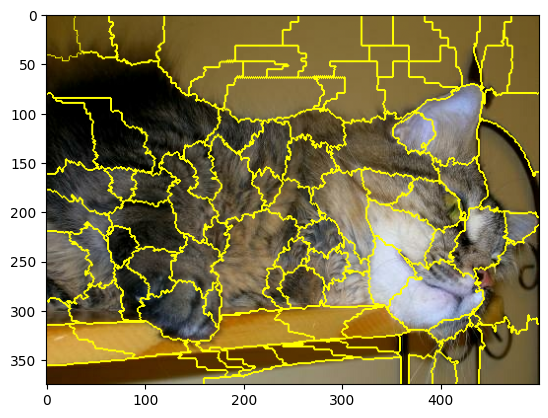

In [40]:
plt.imshow(segmented_image)

In [41]:
# Method to retrieve the number of segments
ndarrayIS_1.get_n_segments()

90

In [42]:
# Method to retrieve the segmentation map
segments = ndarrayIS_1.get_segments()
segments

array([[ 0,  0,  0, ..., 16, 16, 16],
       [ 0,  0,  0, ..., 16, 16, 16],
       [ 0,  0,  0, ..., 16, 16, 16],
       ...,
       [85, 85, 85, ..., 84, 84, 84],
       [85, 85, 85, ..., 84, 84, 84],
       [85, 85, 85, ..., 84, 84, 84]])

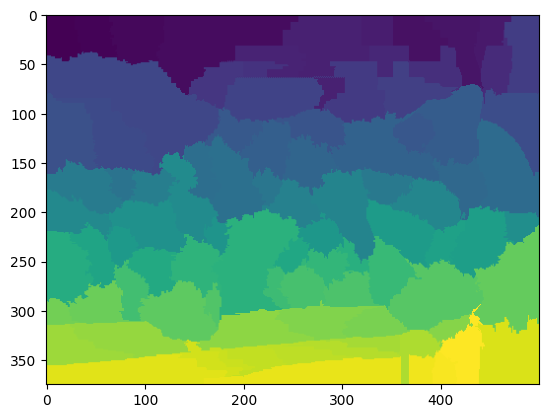

In [43]:
plt.imshow(segments)

In [44]:
# Method to retrieve a map where only the provided segment is shown
#   A single integer or a list of integers can be provided

id = ndarrayIS_1.get_ids_image(4)
# id = ndarrayIS_1.get_ids_image([4, 2, 5])
id

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

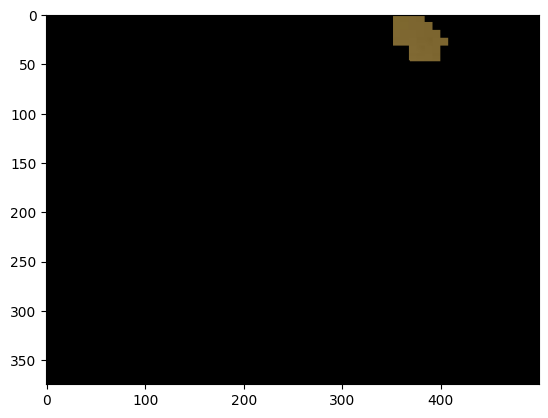

In [45]:
plt.imshow(id)

In [46]:
# Method to retrieve a binary map (where the provided segments are 1)
#   A single integer or a list of integers can be provided

mask_id = ndarrayIS_1.get_ids_mask(4)
mask_id

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

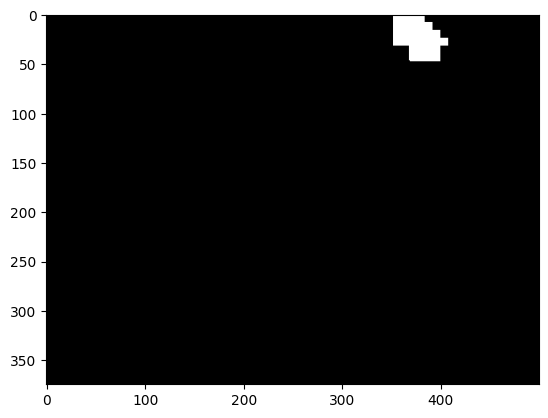

In [47]:
plt.imshow(mask_id, cmap='gray')

In [48]:
# Method that returns the image without the segment specified
#   A single integer or a list of integers can be provided

removed_image = ndarrayIS_1.remove_segment(5)
# removed_image = ndarrayIS_1.remove_segment([3, 6, 28])
removed_image

/Users/zenna/uni/project_work/SEDCT/image_segmentations.py:563: UserWarning: No method to fill the removed segment(s) was specified. 'fill' method as been used as default.
  warnings.warn("No method to fill the removed segment(s) was specified. 'fill' method as been used as default.", category=UserWarning)


array([[[ 91,  65,   6],
        [ 93,  67,   8],
        [ 92,  66,   7],
        ...,
        [108,  85,  31],
        [108,  85,  31],
        [107,  84,  30]],

       [[ 91,  65,   6],
        [ 93,  67,   8],
        [ 92,  66,   7],
        ...,
        [108,  85,  31],
        [108,  85,  31],
        [108,  85,  31]],

       [[ 91,  65,   6],
        [ 93,  67,   8],
        [ 92,  66,   7],
        ...,
        [108,  85,  31],
        [108,  85,  31],
        [108,  85,  31]],

       ...,

       [[ 60,  29,   0],
        [ 60,  29,   0],
        [ 60,  29,   0],
        ...,
        [ 81,  77,  52],
        [ 61,  56,  34],
        [ 39,  34,  12]],

       [[ 61,  30,   1],
        [ 61,  30,   1],
        [ 61,  30,   1],
        ...,
        [ 81,  77,  52],
        [ 61,  56,  34],
        [ 39,  34,  12]],

       [[ 60,  29,   0],
        [ 60,  29,   0],
        [ 60,  29,   0],
        ...,
        [ 82,  76,  54],
        [ 62,  56,  34],
        [ 39,  33,  11]]

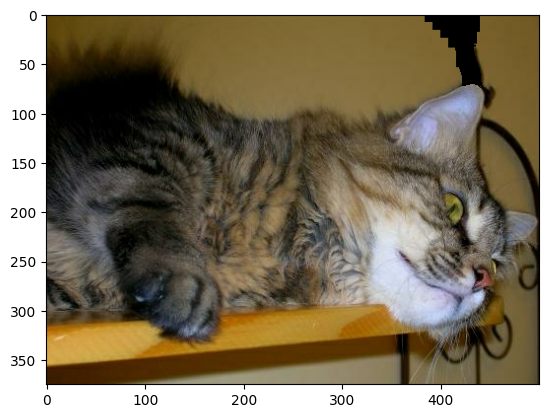

In [49]:
plt.imshow(removed_image)

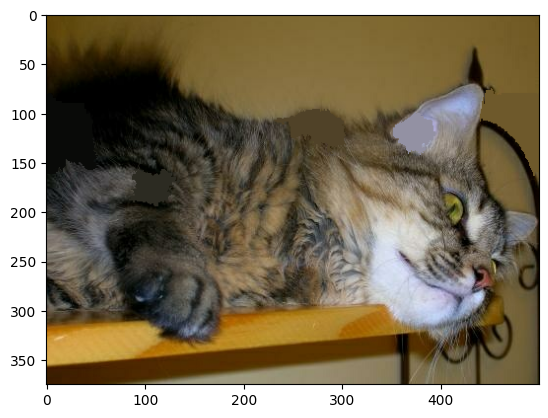

In [50]:
removed_image2 = ndarrayIS_1.remove_segment(fill_method='mean', segment=[22, 21, 23, 24, 38])
plt.imshow(removed_image2)

In [51]:
# Default segmentation is slic, adapted also to grayscale
ndarrayIS_4.compute_segmentation()

/Users/zenna/uni/project_work/SEDCT/image_segmentations.py:215: UserWarning: No segmentation method was specified. 'slic' method with default parameters as been used.
  warnings.warn("No segmentation method was specified. 'slic' method with default parameters as been used.", category=UserWarning)


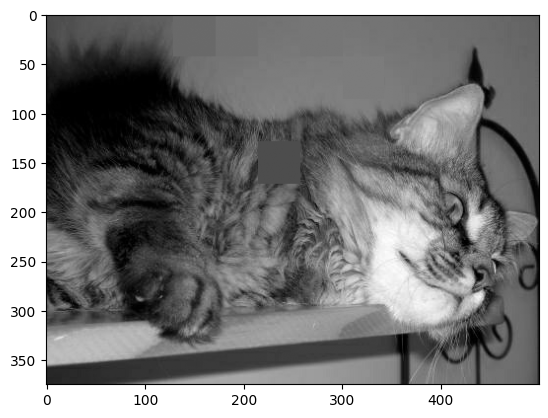

In [52]:
# Test also on grayscale images
removed_image3 = ndarrayIS_4.remove_segment(fill_method='mean', segment=[4, 5, 20, 42, 7])
plt.imshow(removed_image3, cmap='gray')

# Test model_wrappers

## Torch

In [24]:
# Simple model
class Classifier(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.feature_extractor = torch.nn.Sequential(
        self.make_block(3, 16),
        self.make_block(16, 32),
        self.make_block(32, 64),
        self.make_block(64, 128),
        self.make_block(128, 256),
        torch.nn.AdaptiveAvgPool2d(1)
    )

    # Linear + Sigmoid
    self.classifier = torch.nn.Sequential(
        torch.nn.Linear(256, 1),
        torch.nn.Sigmoid()
    )

  def forward(self, x):
    features = torch.flatten(self.feature_extractor(x), 1)
    probs = self.classifier(features)
    return probs

  def make_block(self, in_channels, out_channels):
    # Conv -> Norm -> ReLU -> Conv -> Norm -> Relu
    block = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels,
                        out_channels,
                        kernel_size=3,
                        padding=1),
        torch.nn.BatchNorm2d(out_channels),
        torch.nn.ReLU(),
        torch.nn.Conv2d(out_channels,
                        out_channels,
                        kernel_size=3,
                        padding=1,
                        stride=2), # works as maxpooling
        torch.nn.BatchNorm2d(out_channels),
        torch.nn.ReLU()
    )
    return block

bin_classifier = Classifier()
bin_classifier.load_state_dict(torch.load("classifier.pt", map_location=DEVICE))

<All keys matched successfully>

In [25]:
# Simple transformation object
test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((128, 128)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
# Defining an object of the TorchModelWrapper class
torchMW_binary = TorchModelWrapper(bin_classifier, test_transform)

# Is also possible to inizialize the object providing the following kwargs:
#   - n_classes     -> Integer: 1 if it is binary, otherwise the number of classes
#   - logit_output  -> Boolean: True if the output is in logit format, False otherwise
#
# Example:
#   model_wrapper = TorchModelWrapper(mdodel, transformation, n_classes=1, logit_output=False)

In [27]:
# Inspect the object
inspect.getmembers(torchMW_binary)

[('__abstractmethods__', frozenset()),
 ('__class__', model_wrappers.TorchModelWrapper),
 ('__delattr__',
  <method-wrapper '__delattr__' of TorchModelWrapper object at 0x17d55fad0>),
 ('__dict__',
  {'_n_classes': 1,
   '_output_is_logit': False,
   'device': device(type='mps'),
   'transform': Compose(
       Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
       ToTensor()
       Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
   ),
   'model': Classifier(
     (feature_extractor): Sequential(
       (0): Sequential(
         (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (2): ReLU()
         (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
         (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (5): ReLU()
       )
       (1): Sequential(
         (0): Co

In [28]:
# Analysing the attributes of the object
print(torchMW_binary.device)
print('-'*30)
print(torchMW_binary.model)
print('-'*30)
print(torchMW_binary.transform)
print('-'*30)
print(torchMW_binary._n_classes)
print('-'*30)
print(torchMW_binary._output_is_logit)

mps
------------------------------
Classifier(
  (feature_extractor): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(

In [29]:
# Methods that return the numebr of classes (int) and whether the classifier is multiclass (bool)
print(torchMW_binary.get_n_classes())
print(torchMW_binary.is_multiclass())

1
False


In [31]:
# Method that return the predicted class of the provided image
pred = torchMW_binary.get_pred(img_tensor)
pred

0

In [ ]:
# Method that returns the score of the predicted class of the provided image
#   -> can specify the 'target' parameter when working with a multiclass classifier to get the specific score for that class
score = torchMW_binary.get_score(img_tensor)
score

0.022213971242308617

## SKlearn

In [33]:
# Simple RandomForest classifier
import joblib
import tensorflow as tf
from sklearn.base import BaseEstimator, TransformerMixin

IMG_SIZE = (64,64)

class ResizeAndFlatten(BaseEstimator, TransformerMixin):
    def __init__(self, image_size=IMG_SIZE):
        self.image_size = image_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        processed = []
        for img in X:
            img_resized = tf.image.resize(img, self.image_size).numpy().astype(np.float32)
            processed.append(img_resized.flatten())
        return np.stack(processed)


pipeline_multiclass = joblib.load("pipeline_multiclass.joblib")

In [ ]:
# Defining an object of the SKLearnModelWrapper class
sklearnMW_multiclass = SKLearnModelWrapper(pipeline_multiclass)

# If the object doesn't present a resize transformer or a flattener inside (hence the model is not a pipeline), is possible to 
#  use the parameters:
#   - resize_shape (tuple)
#   - flatten (bool)
# Is also possible to specify:
#   - n_classes -> number of classes of the model, 1 if binary, otherwise the number of classe
#   - resize_method -> method to resize the image
# Example:
#   model_wrapper = SKLearnModelWrapper(model, resize_shape=(64,64), flatten=True, resize_method='bilinear', n_classes=4)

In [35]:
# Inspect the object
inspect.getmembers(sklearnMW_multiclass)

[('__abstractmethods__', frozenset()),
 ('__class__', model_wrappers.SKLearnModelWrapper),
 ('__delattr__',
  <method-wrapper '__delattr__' of SKLearnModelWrapper object at 0x30f281e50>),
 ('__dict__',
  {'_n_classes': 5,
   'resize_method': None,
   'resize_shape': None,
   'flatten': False,
   'model': Pipeline(steps=[('resize_flatten', ResizeAndFlatten()),
                   ('scaler', StandardScaler()),
                   ('clf', HistGradientBoostingClassifier(random_state=42))])}),
 ('__dir__', <function SKLearnModelWrapper.__dir__()>),
 ('__doc__', None),
 ('__eq__',
  <method-wrapper '__eq__' of SKLearnModelWrapper object at 0x30f281e50>),
 ('__format__', <function SKLearnModelWrapper.__format__(format_spec, /)>),
 ('__ge__',
  <method-wrapper '__ge__' of SKLearnModelWrapper object at 0x30f281e50>),
 ('__getattribute__',
  <method-wrapper '__getattribute__' of SKLearnModelWrapper object at 0x30f281e50>),
 ('__getstate__', <function SKLearnModelWrapper.__getstate__()>),
 ('__gt__

In [36]:
# Analysing the attributes of the object
print(sklearnMW_multiclass.model)
print('-'*30)
print(sklearnMW_multiclass.resize_method)
print('-'*30)
print(sklearnMW_multiclass.flatten)
print('-'*30)
print(sklearnMW_multiclass.resize_shape)
print('-'*30)
print(sklearnMW_multiclass._n_classes)

Pipeline(steps=[('resize_flatten', ResizeAndFlatten()),
                ('scaler', StandardScaler()),
                ('clf', HistGradientBoostingClassifier(random_state=42))])
------------------------------
None
------------------------------
False
------------------------------
None
------------------------------
5


In [37]:
# Methods that return the numebr of classes (int) and whether the classifier is multiclass (bool)
print(sklearnMW_multiclass.get_n_classes())
print(sklearnMW_multiclass.is_multiclass())

5
True


In [38]:
# Method that return the predicted class of the provided image
pred = sklearnMW_multiclass.get_pred(img_np)
pred

0

In [41]:
# Method that returns the score of the predicted class of the provided image
#   -> can specify the 'target' parameter when working with a multiclass classifier to get the specific score for that class 
#       in a tuple with the score of predicted class 
score = sklearnMW_multiclass.get_score(img_np, target=1)
score

(0.8116484984532212, 0.011969902975249901)